In [1]:
import pickle
import pandas as pd
import os
import geopy
import geopandas as gpd

import sys
sys.path.append("../")
import src.supportClean as sc

import sys
sys.path.append("../")
import src.bibliotheque as bb

import sys
sys.path.append("../")
import src.supportCharts as sch

# data input

In [2]:
path = '../data/fotocasa/'

In [3]:
df_fotocasa = sc.openMultiplePickles(path)
print(df_fotocasa.shape)
df_fotocasa.head()

(5842, 9)


,name,price,address,owner,url,amenities,element,page,dateScraped
0,Apartamento con aire acondicionado en Calle de...,2.860 € /mes,"[, calefacción en Calle de la Unión, Centro]",https://www.fotocasa.es/es/inmobiliaria-homeli...,https://www.fotocasa.es/es/alquiler/vivienda/m...,2 habs.\n1 baño\n180 m²\nPrincipal\nCalefacción,1,19,2023-04-12 18:36:38.060615
1,Apartamento con calefacción en Calle de Precia...,2.167 € /mes,"[, calefacción en Calle de Preciados, Centro]",https://www.fotocasa.es/es/inmobiliaria-homeli...,https://www.fotocasa.es/es/alquiler/vivienda/m...,1 hab.\n1 baño\n65 m²\nBajos\nCalefacción,2,19,2023-04-12 18:36:56.322321
2,Apartamento con calefacción en Calle de Arriaz...,2.170 € /mes,"[, calefacción en Calle de Arriaza, Moncloa -...",https://www.fotocasa.es/es/inmobiliaria-homeli...,https://www.fotocasa.es/es/alquiler/vivienda/m...,1 hab.\n1 baño\n70 m²\nEntresuelo\nCalefacción,3,19,2023-04-12 18:37:12.994296
3,Apartamento con calefacción en Avenida de la C...,1.513 € /mes,"[, calefacción en Avenida de la Ciudad de Bar...",https://www.fotocasa.es/es/inmobiliaria-homeli...,https://www.fotocasa.es/es/alquiler/vivienda/m...,1 hab.\n1 baño\n67 m²\n2ª Planta\nCalefacción,4,19,2023-04-12 18:37:28.305157
4,Apartamento con calefacción en Conde de Romano...,1.701 € /mes,"[, calefacción en Conde de Romanones, Centro]",https://www.fotocasa.es/es/inmobiliaria-homeli...,https://www.fotocasa.es/es/alquiler/vivienda/m...,2 habs.\n1 baño\n60 m²\nEntresuelo\nCalefacción,5,19,2023-04-12 18:37:44.508658


# data cleaning
## address

In [4]:
df_fotocasa['name'][14]

'Apartamento con 1 baño en Calle Rufino Blanco, Barrio de Salamanca\n1.800 € /mes'

In [5]:
df_fotocasa['address_clean'] = df_fotocasa['name'].str.lower().str.findall(r'en (.*)\n').explode() + ', madrid, españa'
df_fotocasa['address_clean'].value_counts()

address_clean
centro, madrid, españa                          262
barrio de salamanca, madrid, españa             227
chamartín, madrid, españa                       207
tetuán, madrid, españa                          136
chamberí, madrid, españa                        124
                                               ... 
divino valles, arganzuela, madrid, españa         1
belzunegui, carabanchel, madrid, españa           1
feria, san blas, madrid, españa                   1
andrés mellado, chamberí, madrid, españa          1
calle de doña urraca, latina, madrid, españa      1
Name: count, Length: 2012, dtype: int64

There will be some apartments that won't have a reliable geolocation due to the desciption of the location being quite vague.

In [6]:
df_fotocasa[df_fotocasa['address_clean'] == 'centro'].head()

,name,price,address,owner,url,amenities,element,page,dateScraped,address_clean


## owner

In [7]:
df_fotocasa['owner_clean'] = df_fotocasa['owner'].str.lower().str.findall(r'https://www.fotocasa.es/es/inmobiliaria-(.*)/alquiler').explode().str.replace('-', ' ')
df_fotocasa['owner_clean'].value_counts()

owner_clean
homelike                                             892
area casa                                            810
ukio                                                 210
agencia negociadora del alquiler                     150
renta garantizada sa                                 150
alquila tu hogar                                     150
aproperties real estate madrid                       120
roomless                                             120
alquiler seguro                                      120
engel volkers madrid                                 120
inmosai                                               90
mosaic inmobiliaria                                   90
solvia inmobiliaria                                   60
elephant real estate                                  60
astondo real estate                                   60
live 4 life                                           60
scala properties                                      60
housfy             

## name

In [8]:
df_fotocasa.tail()

,name,price,address,owner,url,amenities,element,page,dateScraped,address_clean,owner_clean
5837,"Piso con 1 baño en Taquigrafia, San Blas\n825 ...",825 € /mes,"[ 1 baño en Taquigrafia, San Blas]",,https://www.fotocasa.es/es/alquiler/vivienda/m...,2 habs.\n1 baño\n57 m²\n4ª Planta,26,11,2023-04-12 16:14:24.481695,"taquigrafia, san blas, madrid, españa",NaN
5838,"Piso con aire acondicionado en San Onofre, Cen...",2.100 € /mes,"[ aire acondicionado en San Onofre, Centro]",,https://www.fotocasa.es/es/alquiler/vivienda/m...,3 habs.\n2 baños\n95 m²\n3ª Planta\nCalefacción,27,11,2023-04-12 16:14:37.530981,"san onofre, centro, madrid, españa",NaN
5839,Apartamento con aire acondicionado en Calle de...,1.078 € /mes,"[, aire acondicionado en Calle de Doña Urraca...",,https://www.fotocasa.es/es/alquiler/vivienda/m...,1 hab.\n1 baño\n35 m²\nSótano\nCalefacción,28,11,2023-04-12 16:14:51.001228,"calle de doña urraca, latina, madrid, españa",NaN
5840,"Piso con 1 baño en Calle de Cebreros, Latina\n...",850 € /mes,"[ 1 baño en Calle de Cebreros, Latina]",,https://www.fotocasa.es/es/alquiler/vivienda/m...,2 habs.\n1 baño\n59 m²\n1ª Planta,29,11,2023-04-12 16:15:23.311166,"calle de cebreros, latina, madrid, españa",NaN
5841,"Piso en Jose Tamayo, Villa de Vallecas\n955 € ...",955 € /mes,[],,https://www.fotocasa.es/es/alquiler/vivienda/m...,2 habs.\n1 baño\n66 m²\n4ª Planta\nAscensor,30,11,2023-04-12 16:15:36.461862,"jose tamayo, villa de vallecas, madrid, españa",NaN


In [9]:
df_fotocasa['name_clean'] = df_fotocasa['name'].str.lower().str.findall(r'(.*)\n.*€ /mes').explode()#.str.replace('-', ' ')
df_fotocasa['name_clean'].value_counts()

name_clean
piso con ascensor en barrio de salamanca                              100
piso con balcón en centro                                              90
piso con ascensor en chamartín                                         81
piso con ascensor en centro                                            78
piso con terraza en chamartín                                          54
                                                                     ... 
piso con ascensor en san german, tetuán                                 1
ático con terraza en del ensanche de vallecas, villa de vallecas        1
piso con terraza en calle ramón azorín, latina                          1
estudio con ascensor en calle del pintor juan gris, tetuán              1
apartamento con aire acondicionado en calle de doña urraca, latina      1
Name: count, Length: 2614, dtype: int64

In [39]:
df_fotocasa['price_clean'] = df_fotocasa['price'].str.replace(' € /mes', '')
df_fotocasa['price_clean'].value_counts()

price_clean
1.100    232
1.200    210
1.500    172
1.300    140
1.400    137
        ... 
1.629      1
2.822      1
2.355      1
1.320      1
4.090      1
Name: count, Length: 584, dtype: int64

# geolocation

In [10]:
df_fotocasa_geolocated = sc.geolocation(df_fotocasa, 'address_clean')

  3%|▎         | 169/5842 [02:47<1:34:33,  1.00s/it]RateLimiter caught an error, retrying (0/2 tries). Called with (*('calle del 7 de julio, centro, madrid, españa',), **{}).
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/urllib3/connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/site-packages/urllib3/connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 1377, in getresponse
    response.begin()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/iron2/lib/python3.9/http/client.py", line 281, in _read_

In [40]:
df_fotocasa_geolocated.drop(['name', 'owner',  'location', 'address', 'amenities', 'element',	'page',	'dateScraped'], axis =1, inplace=True)

# EDA

In [42]:
sch.analisis_basico(df_fotocasa_geolocated)

_________________________________

1_Data Structure: (4828, 9)


,price,url,address_clean,owner_clean,name_clean,point,latitude,longitude,altitude
0,2.860 € /mes,https://www.fotocasa.es/es/alquiler/vivienda/m...,"calle de la unión, centro, madrid, españa",homelike,apartamento con aire acondicionado en calle de...,"(40.4172676, -3.7104333, 0.0)",40.417268,-3.710433,0.0
1,2.167 € /mes,https://www.fotocasa.es/es/alquiler/vivienda/m...,"calle de preciados, centro, madrid, españa",homelike,apartamento con calefacción en calle de precia...,"(40.418129, -3.7046339, 0.0)",40.418129,-3.704634,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 4828 entries, 0 to 5841
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4828 non-null   object 
 1   url            4828 non-null   object 
 2   address_clean  4828 non-null   object 
 3   owner_clean    4015 non-null   object 
 4   name_clean     4821 non-null   object 
 5   point          4828 non-null   object 
 6   latitude       4828 non-null   float64
 7   longitude      4828 non-null   float64
 8   altitude       4828 non-null   float64
dtypes: float64(3), object(6)
memory usage: 377.2+ KB


None

_________________________________

2_Duplicated columns:
720
_________________________________

3_Null values distribution:


,price,url,address_clean,owner_clean,name_clean,point,latitude,longitude,altitude
nulos,0,0,0,813,7,0,0,0,0
dtypes,object,object,object,object,object,object,float64,float64,float64


_________________________________

4_Numerical variables distribution:


,latitude,longitude,altitude
count,4828.000000,4828.000000,4828.0
mean,40.430437,-3.692511,0.0
std,0.035245,0.033604,0.0
min,40.257821,-3.795852,0.0
25%,40.411150,-3.707955,0.0
50%,40.429279,-3.698281,0.0
75%,40.451755,-3.676129,0.0
max,40.556346,-3.546758,0.0


_________________________________

5_Categorical variables distribution:


,price,url,address_clean,owner_clean,name_clean,point
count,4828,4828,4828,4015,4821,4828
unique,530,3414,1545,59,2048,1334
top,1.100 € /mes,https://www.fotocasa.es/es/alquiler/vivienda/m...,"centro, madrid, españa",homelike,piso con ascensor en barrio de salamanca,"(40.417652700000005, -3.70795469569446, 0.0)"
freq,202,10,262,785,100,262


numeric variables distribution


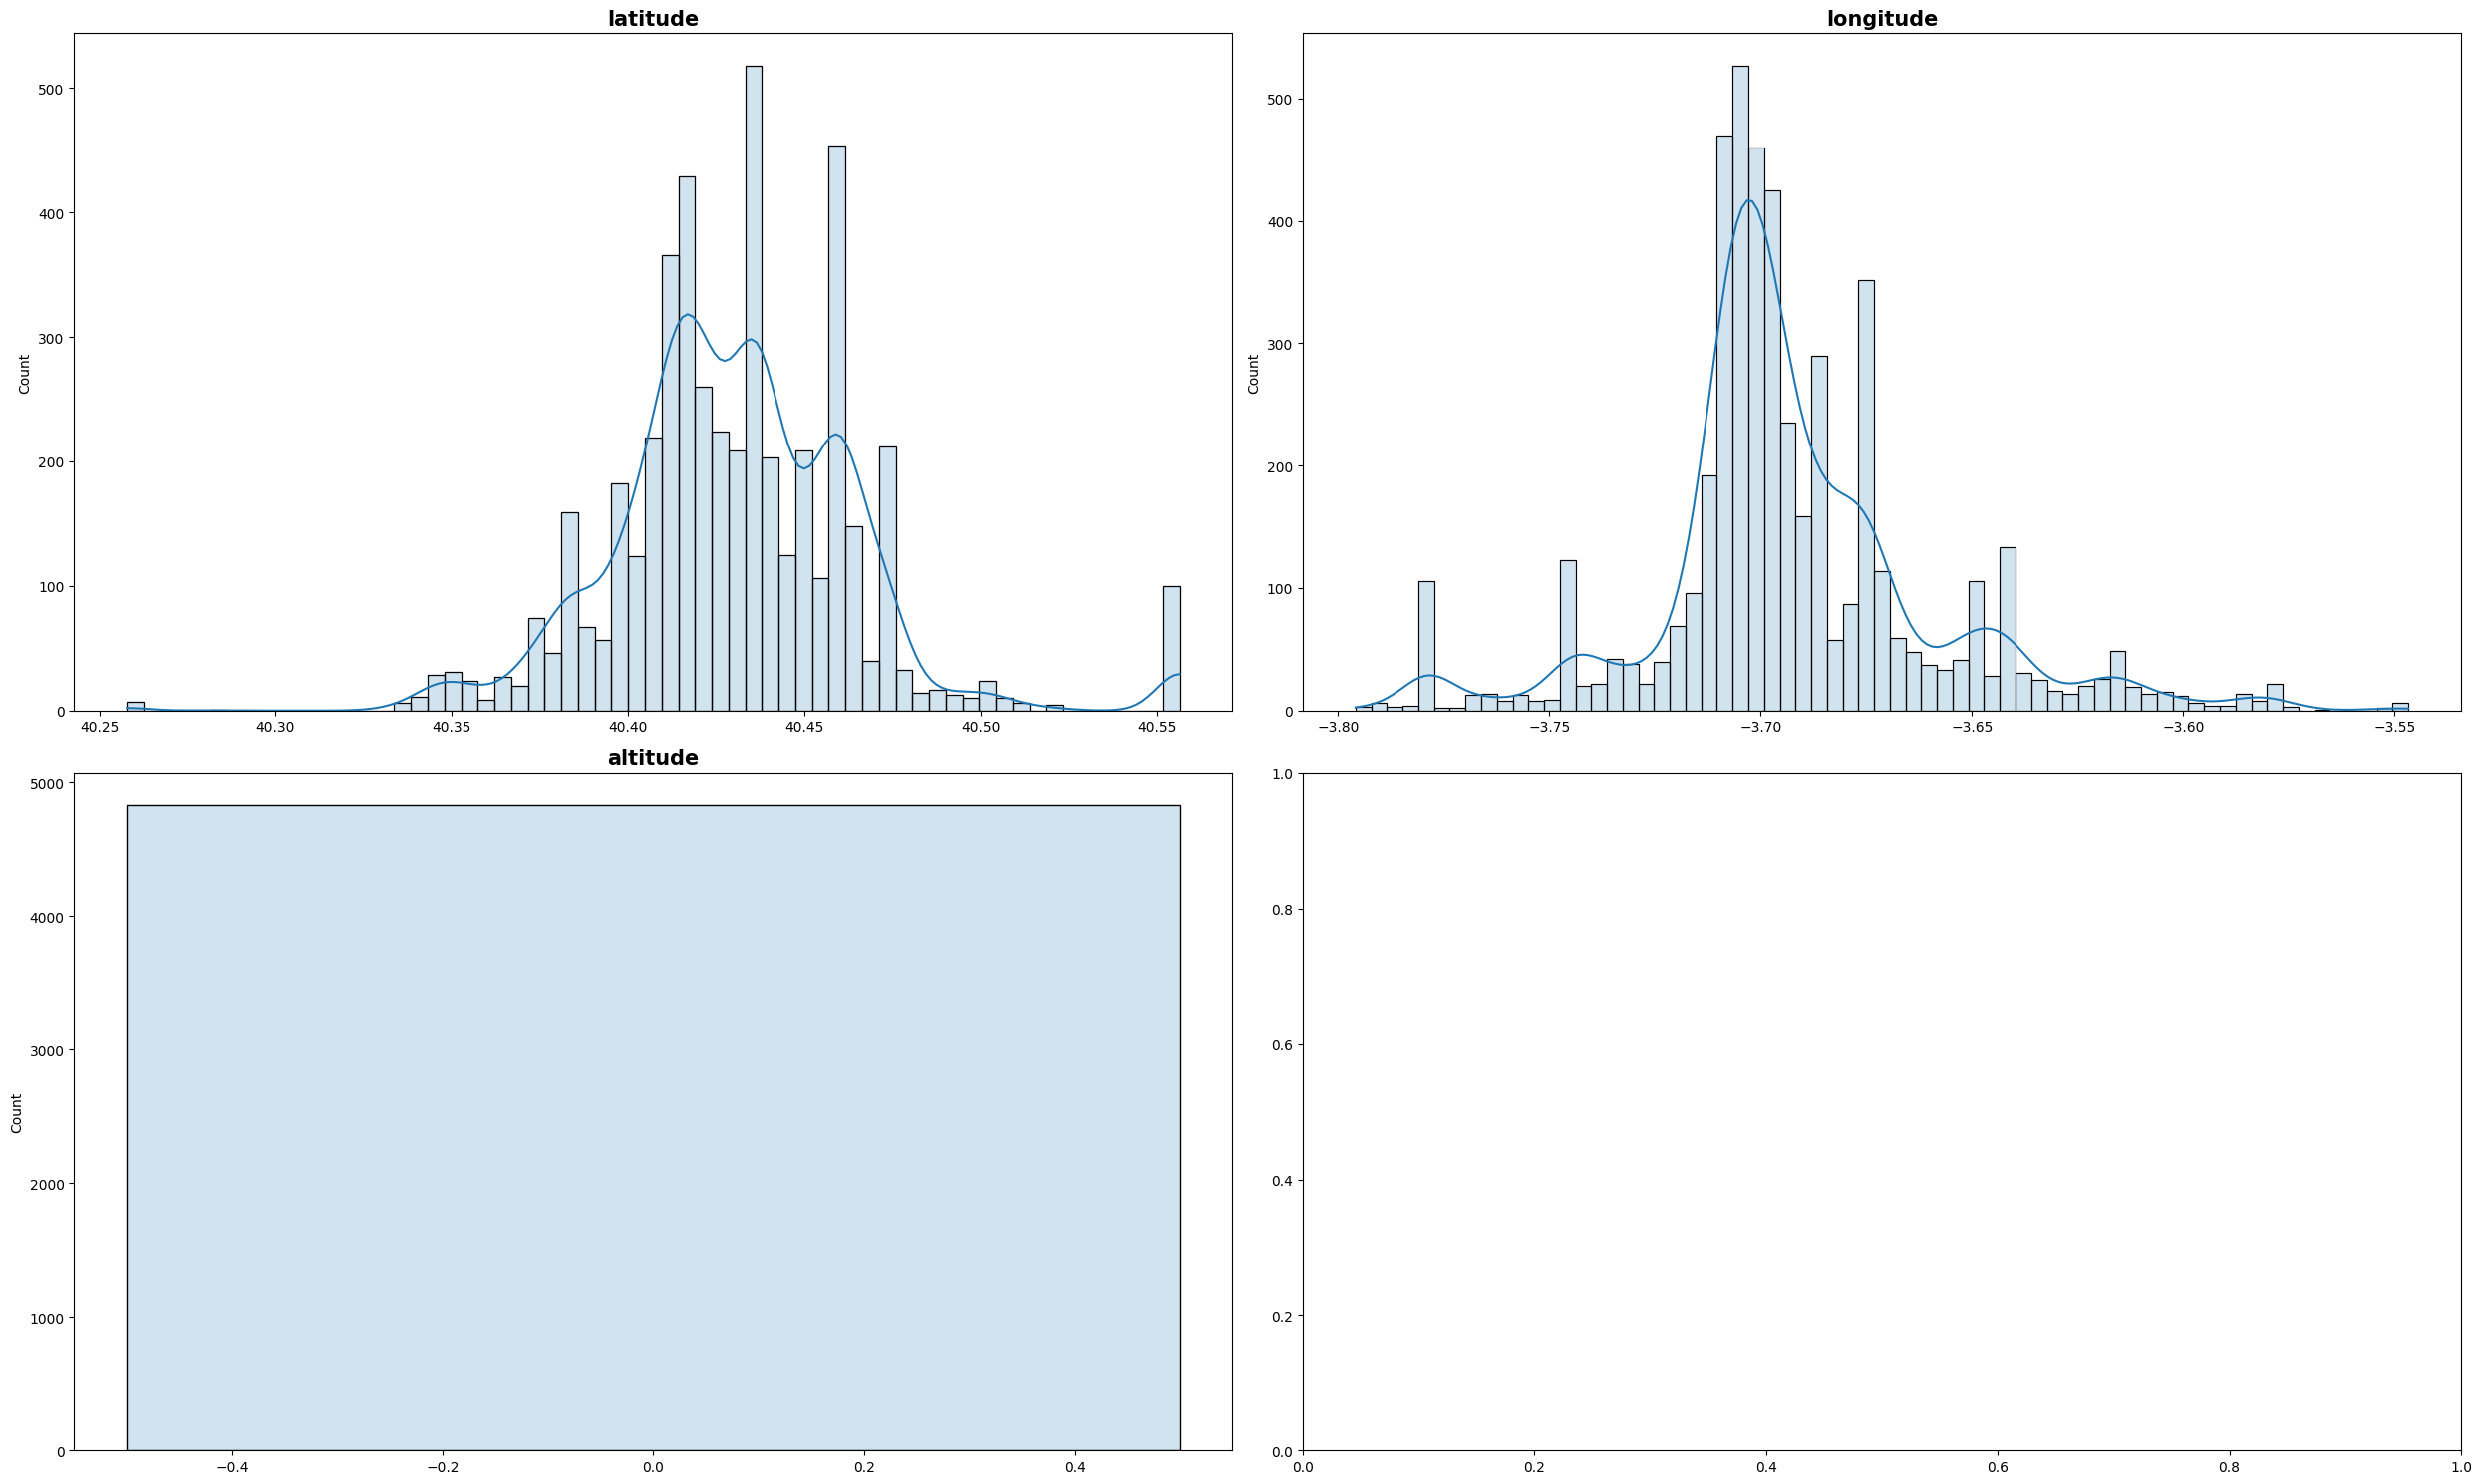

In [43]:
sch.distribucion_numericas(df_fotocasa_geolocated)

numeric variables distribution -> outliers


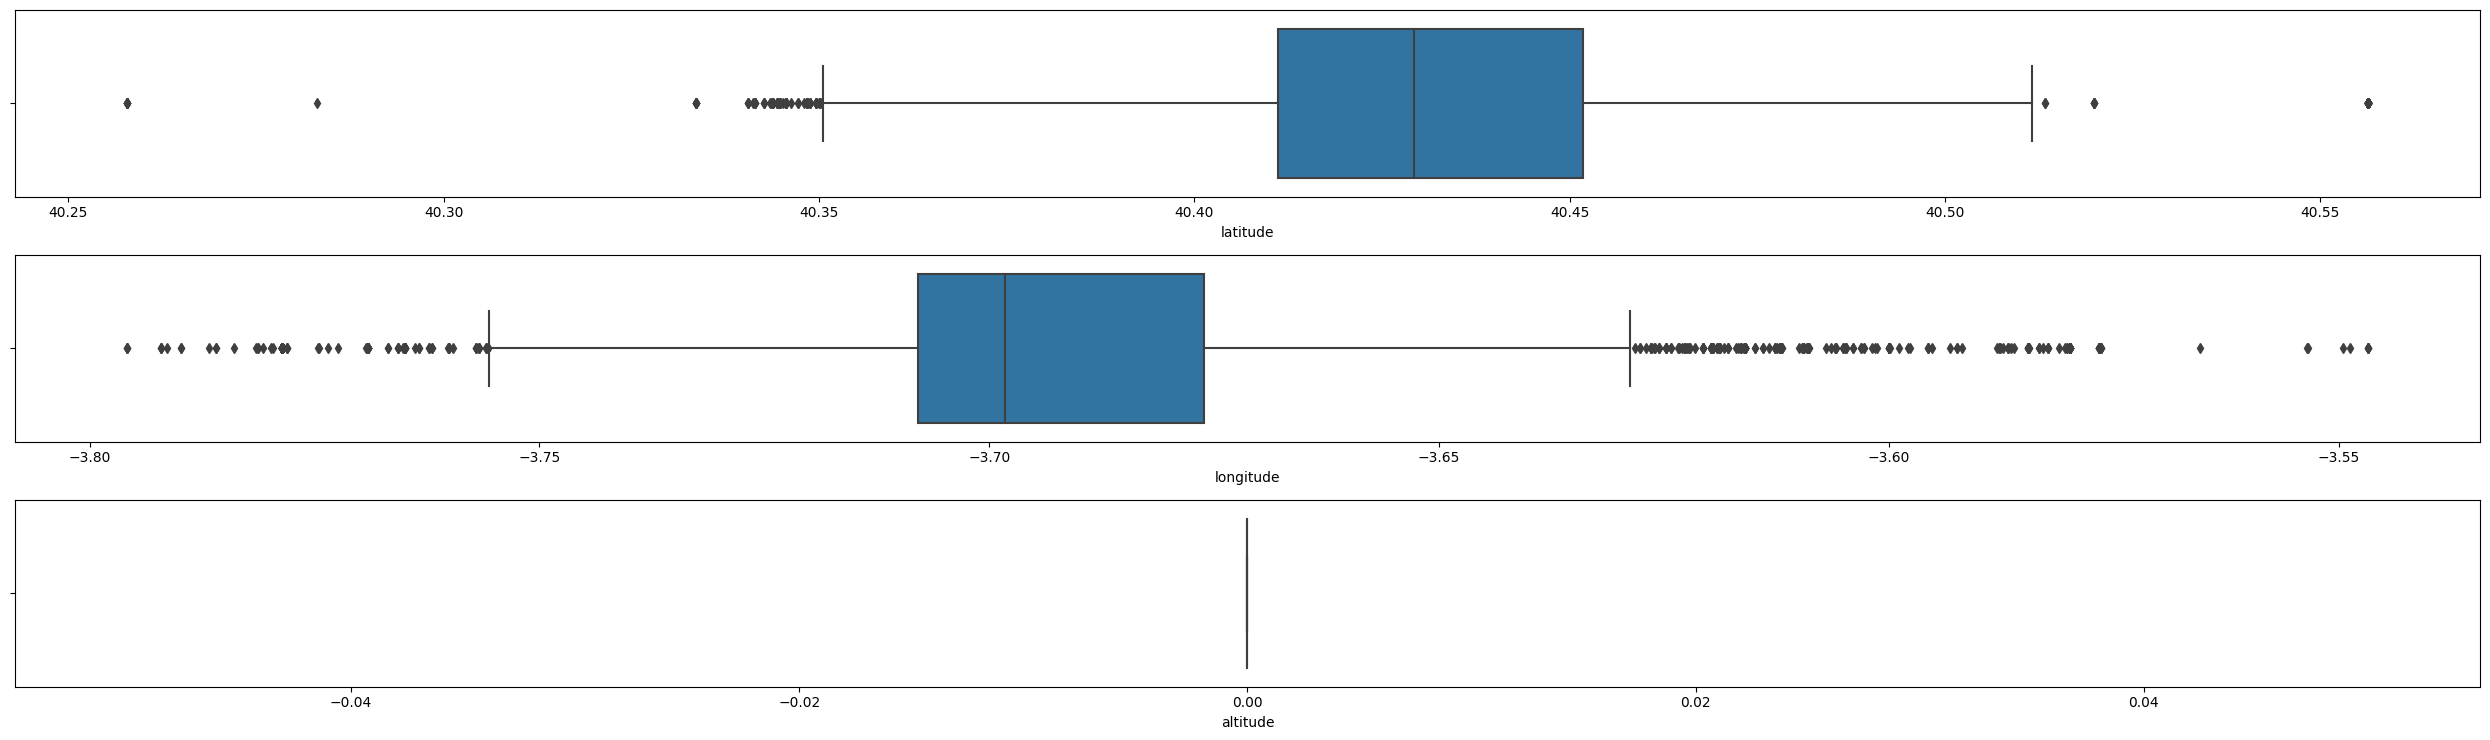

In [44]:
sch.chart_boxplot(df_fotocasa_geolocated)

There are some points that have outliers on the location column. We will drop them in order to keep the values within the city of Madrid.

In [45]:
print(df_fotocasa_geolocated.shape)

(4828, 9)


In [46]:
df_fotocasa_geolocated = df_fotocasa_geolocated[df_fotocasa_geolocated['latitude'] < 42]
df_fotocasa_geolocated = df_fotocasa_geolocated[df_fotocasa_geolocated['longitude'] < 0]

In [47]:
print(df_fotocasa_geolocated.shape)

(4828, 9)


In [48]:
gdf_fotocasa_geolocated = gpd.GeoDataFrame(df_fotocasa_geolocated, geometry=gpd.points_from_xy(df_fotocasa_geolocated.longitude, df_fotocasa_geolocated.latitude)).set_crs('epsg:4326')

In [49]:
sch.foliumMap(gdf_fotocasa_geolocated, 'points')

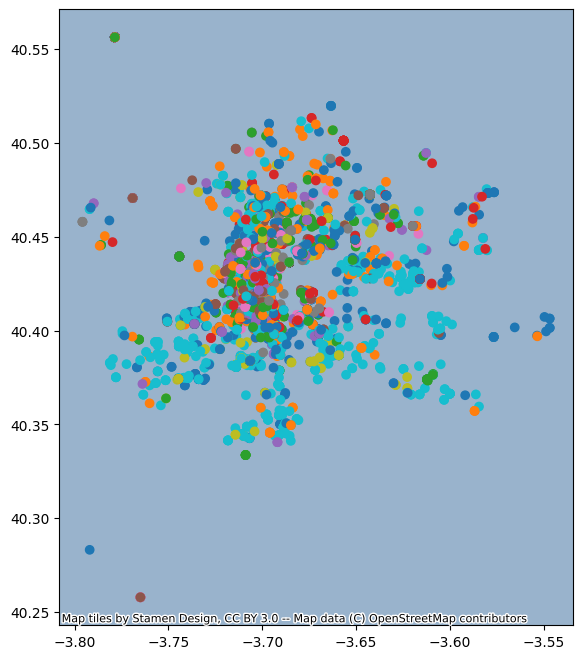

In [51]:
sch.plotMap(gdf_fotocasa_geolocated, 'price')

# Export

In [53]:
sc.exportFiles(gdf_fotocasa_geolocated.drop(['point'], axis = 1), df_fotocasa_geolocated, 'fotocasa')